In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [5]:
data=pd.read_csv(r"C:\Users\dell\Downloads\AutoBi.csv")

In [6]:
data.head()

,Index,CASENUM,ATTORNEY,CLMSEX,MARITAL,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,5,1,1.0,NaN,2.0,1.0,50.0,34.940
1,2,13,2,2.0,2.0,1.0,1.0,28.0,10.892
2,3,66,2,1.0,2.0,2.0,1.0,5.0,0.330
3,4,71,1,1.0,1.0,2.0,2.0,32.0,11.037
4,5,96,2,1.0,4.0,2.0,1.0,30.0,0.138


In [7]:
data.isnull().sum()

Index         0
CASENUM       0
ATTORNEY      0
CLMSEX       12
MARITAL      16
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
data.shape

(1340, 9)

In [12]:
# Replace 'NA' with 0 in specific columns
columns_to_replace = ['CLMSEX', 'MARITAL','CLMINSUR','SEATBELT','CLMAGE']  # Replace with your column names
data[columns_to_replace] = data[columns_to_replace].replace('NA', 0)


In [13]:
data.head(25)


,Index,CASENUM,ATTORNEY,CLMSEX,MARITAL,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,5,1,1.0,0.0,2.0,1.0,50.0,34.940
1,2,13,2,2.0,2.0,1.0,1.0,28.0,10.892
2,3,66,2,1.0,2.0,2.0,1.0,5.0,0.330
3,4,71,1,1.0,1.0,2.0,2.0,32.0,11.037
4,5,96,2,1.0,4.0,2.0,1.0,30.0,0.138
5,6,97,1,2.0,1.0,2.0,1.0,35.0,0.309
6,7,120,1,1.0,2.0,2.0,1.0,19.0,3.538
7,8,136,1,2.0,2.0,2.0,1.0,34.0,4.882
8,9,152,2,2.0,2.0,2.0,1.0,61.0,0.874
9,10,155,2,1.0,2.0,2.0,1.0,0.0,1.351


In [14]:
data.isnull().sum()

Index       0
CASENUM     0
ATTORNEY    0
CLMSEX      0
MARITAL     0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [15]:
data.describe()

,Index,CASENUM,ATTORNEY,CLMSEX,MARITAL,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,17213.464179,1.488806,1.544776,1.573881,1.849254,0.980597,27.942537,5.953461
std,386.968991,10014.769208,0.500061,0.515853,0.669224,0.435152,0.227818,19.470599,33.136205
min,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000
25%,335.750000,8579.000000,1.000000,1.000000,1.000000,2.000000,1.000000,16.000000,0.640000
50%,670.500000,17452.500000,1.000000,2.000000,2.000000,2.000000,1.000000,27.000000,2.331000
75%,1005.250000,25702.750000,2.000000,2.000000,2.000000,2.000000,1.000000,41.000000,3.994750
max,1340.000000,34253.000000,2.000000,2.000000,4.000000,2.000000,2.000000,95.000000,1067.697000


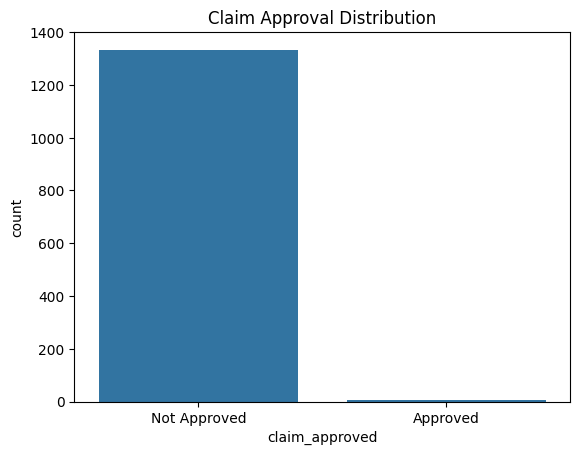

In [19]:
data['claim_approved'] = data['LOSS'].apply(lambda x: 'Approved' if x == 1 else 'Not Approved')
sns.countplot(x='claim_approved', data=data)
plt.title('Claim Approval Distribution')
plt.show()


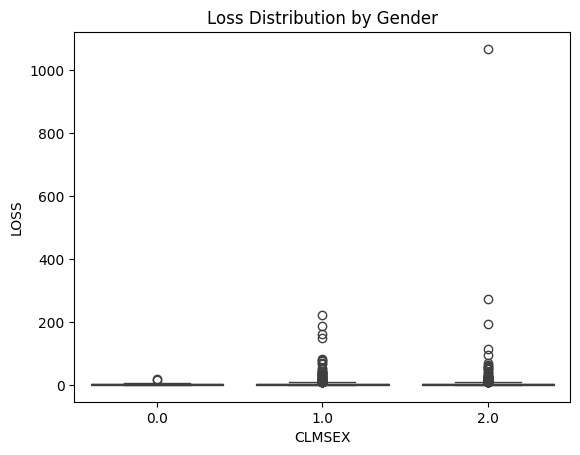

In [20]:
sns.boxplot(x='CLMSEX', y='LOSS', data=data)
plt.title('Loss Distribution by Gender')
plt.show()


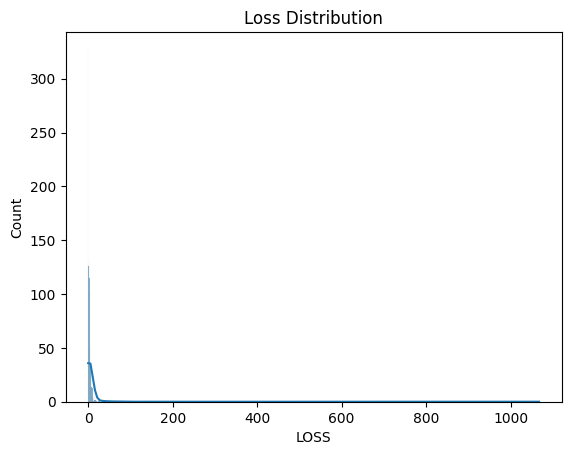

In [21]:
sns.histplot(data['LOSS'], kde=True)
plt.title('Loss Distribution')
plt.show()


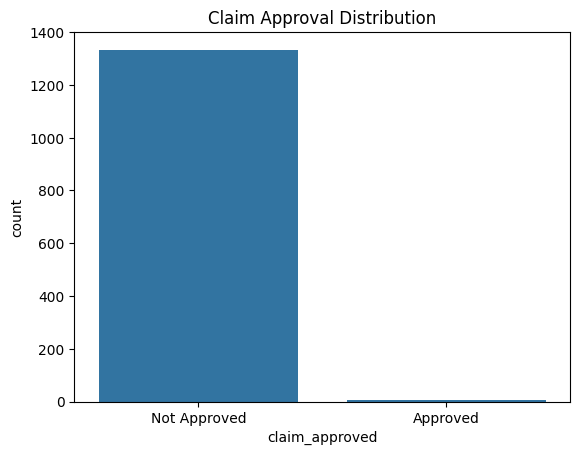

In [22]:
sns.countplot(x='claim_approved', data=data)
plt.title('Claim Approval Distribution')
plt.show()

In [24]:
# Splitting data into features and target variable
X = data.drop('claim_approved', axis=1)  # Features
y = data['claim_approved']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Scaling the features (important for algorithms like Logistic Regression, SVM, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [27]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)


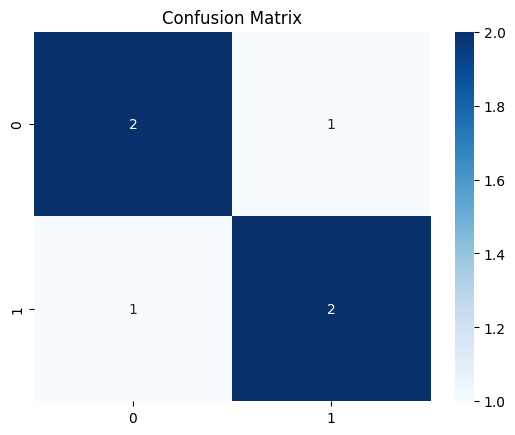

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Define actual values and predicted values
y_true = [0, 1, 0, 1, 1, 0]  # Actual values (ground truth)
y_pred = [0, 1, 0, 0, 1, 1]  # Predicted values by your model

# Now, calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()



In [33]:
# Additional analysis on feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


    Feature  Importance
4   MARITAL    0.832952
3    CLMSEX    0.410141
1   CASENUM    0.278649
0     Index    0.268137
8      LOSS    0.166540
6  SEATBELT   -0.045556
7    CLMAGE   -0.275501
5  CLMINSUR   -0.412629
2  ATTORNEY   -0.937387
